# **Laboratorio 10: Una introducción a la regresión lineal**
**Facultad de ingeniería, departamento de Ingeniería Biomédica, Universidad de los Andes**\
**IBIO-2440 Programación científica**

**Nombres de los integrantes**


1.   Paola Andrea Campiño 202020785
2.   Isabella Contreras 202011871

**Número del grupo**

*5*

# **Introducción**
La regresión lineal busca encontrar los parámetros de una ecuación  que precedice el valor de una variable  $y$ a partir de las variables en el vector $x$. Las variables en $x$ se conocen como predictores y los parámetros de la ecuación se denotan por $\beta$. La búsqueda de los parámetros de la ecuación, es decir, $\beta$, usualmente se realiza usando un conjunto de observaciones de estas variables. Este modelo se usa en múltiples campos y comprender su funcionamento es fundamental en ingeniería.


Considere el conjunto de observaciones:

\begin{align*}
   \{(x^{(1)},y^{(1)}), (x^{(2)},y^{(2)}), ... , (x^{(m)},y^{(m)})\}.
 \end{align*}

Para este ejercicio, asumamos que la relación entre la variables $x$ y $y$ se define mediante la siguiente ecuación:
\begin{align*}
  y^* = g(x; \beta)=β_{0} + \beta_1 x,\\
 \end{align*}
donde los $\beta_i$ son los coeficientes de la ecuación que deben ser encontrados a través la resolución de un problema de optimización. Dicho problema se denomina problema de *mínimos cuadrados*, el cual busca los valores de $\beta$ tales que se minimice la distancia al cuadrado entre los valores de $y^{(j)}$ (es decir, el valor de $y$ observado) y $g(x^{(j)};\beta)$ (es decir, el valor de $y$ estimado por la ecuación).  De forma matemática, el problema se formula como :

\begin{align*}
  \min_{\beta\in\mathbb{R}^n} \left | \left|  y^{(j)}-g\left (x^{(j)};\beta \right)  \right| \right|_2^2 .
 \end{align*}

 La siguiente figura ilustra el resultado de resolver el problema de regresión.

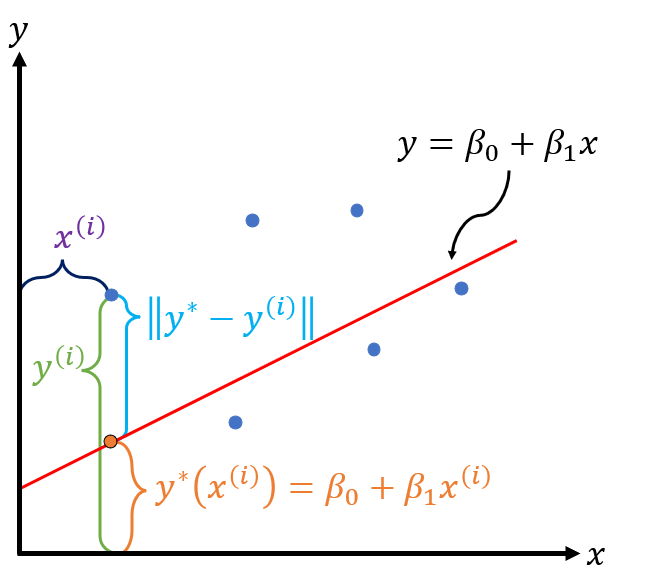


Aquí, $\beta = [\beta_0, \beta_1]^T$. Hay que notar que el problema de optimizacón anterior se puede reescribir como:
\begin{align*}
  \min_{\beta\in\mathbb{R}^n}\left | \left| y^{(j)}-\left ( β_{0} + \beta_1 x^{(j)} \right)\right| \right|_2^2 .
 \end{align*}


La operación $β_{0} + \beta_1 x^{(j)}$, se puede escribir vectorialmente como:

\begin{align*}
  β_{0} + \beta_1 x^{(j)} = [1, x^{(j)}] \beta.
\end{align*}

Lo anterior está escrito para la observación $j$. Para incluir a todos los $m$ puntos, se plantea el siguiente sistema de ecuaciones lineales de forma matricial:
\begin{align*}
   \begin{bmatrix}
      β_{0} + \beta_1 x^{(1)}\\
      β_{0} + \beta_1 x^{(2)}\\
      \vdots\\
      β_{0} + \beta_1 x^{(m)}
   \end{bmatrix}
   =
   \begin{bmatrix}
      1 & x^{(1)}\\
      1 &  x^{(2)}\\
      \vdots & \vdots\\
      1 & x^{(m)}
   \end{bmatrix}
   \begin{bmatrix}
    \beta_0\\
    \beta_1
   \end{bmatrix}.
\end{align*}

La matriz que acompaña a $\beta$ se nombrará $H$. El problema de optimización se reescribe entonces como :
 \begin{align*}
   \min_{\beta\in\mathbb{R}^n}||y-H\beta||_2^2,
 \end{align*}

donde $y=[y^{(1)}, y^{(2)}, ..., y^{(m)}]^T$.

La solución a este problema se denota $\beta^*=[\beta_0^*,\beta_1^*]^T$, los cuales son los coeficientes que resuelven el problema. El potencial de este método es que tiene solución analítica, la cual se puede hallar encontrando su gradiente de la función objetivo e igualándolo a cero. Esta solución es:
\begin{align*}
  \beta^* =  (H^TH)^{-1}H^Ty .
 \end{align*}

Usando el mismo procedimiento, se pueden realizar proceso de regresión para ecuaciones con un grado polinómico más alto, como por ejemplo:
 \begin{align*}
    y = g(x;\beta)=\sum_{i=0}^{n} \beta_i x^i
 \end{align*}
Si rescribe lo anterior de forma matricial para todos los $m$ puntos, queda:

\begin{align*}
   \begin{bmatrix}
      1 & x^{(1)} & \left(x^{(1)}\right)^2 & \cdots & \left(x^{(1)}\right)^n\\
      1 & x^{(2)} & \left(x^{(2)}\right)^2 & \cdots & \left(x^{(2)}\right)^n\\
      \vdots & \vdots & \vdots & \ddots & \vdots \\
      1 & x^{(m)} & \left(x^{(m)}\right)^2 & \cdots & \left(x^{(m)}\right)^n\\
   \end{bmatrix}
   \begin{bmatrix}
    \beta_0\\
    \beta_1\\
    \vdots\\
    \beta_m
   \end{bmatrix}
\end{align*}

Donde la matriz que acompaña el vector $\beta$ es la nueva matriz $H$, por lo que, al final, la solución analítica se encuentra mediante la misma ecuación mencionada. Cabe resaltar que, con la lógica anterior, es posible encontrar analíticamente los coeficientes para cualquier ecuación deseada, por ejemplo, si se quisiera una combinación de funciones trigonométricas, es decir:

\begin{align*}
  y^*=\beta_0 + \beta_1\cos(x) + \beta_2\sin(x)
\end{align*}

Solo bastaría con modificar la matriz $H$ y solucionar el problema de la misma manera.


# **Contexto del problema**

En el análisis de movimiento humano es importante medir fuerzas, torques y potencias, las cuales permiten evaluar el desgaste metabólico del paciente al realizar algún ejercicio y, también, diseñar de forma eficiente prótesis biónicas a partir de teoría de robótica. Calcular estas variables se logra al medir inicialmente la aceleración de un cuerpo través del análisis de video o a través del uso de acelerómetros. En el caso del análisis de video, es usual capturar primero la posición vertical y horizontal del cuerpo para eventualmene estimar la aceleración. Es fundamental tener mediciones de señales de posición que no tienen variaciones demasiado rápidas debido al ruido para realizar un análisis preciso.

# **Descripción de la práctica**

En esta prática se desea construir un modelo que regresión que permita predecir la trayectoria del codo en el movimiento al abrir y cerrar una puerta como se muestra en el siguiente esquema:



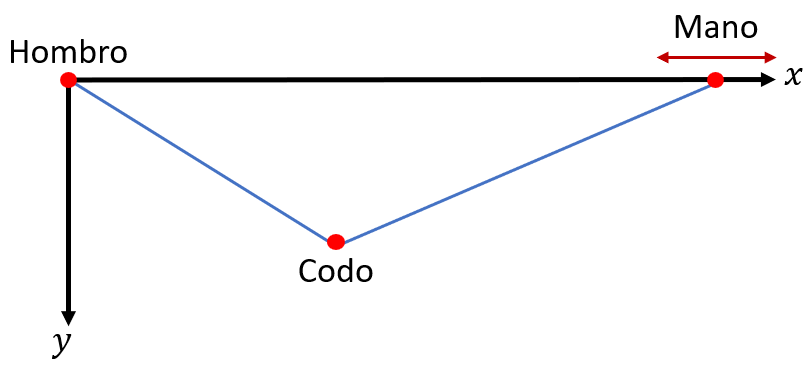

Para efectos de la prática, se definirán las siguientes variables:

- $t$: Tiempo transcurrido
- $x$: Posición horizontal
- $y$: posición vertical

1. Importe los datos del archivo excel *datos.xslx*, donde la primera columna corresponde al tiempo $(t)$, la segunda a la posición horizontal $(x)$ y la tercera a la vertical $(y)$. Luego, grafíquelos de la siguiente manera:

- Un gráfico donde se muestre $y$ vs $t$
- Un gráfico donde se muestre $y$ vs $x$


<bound method NDFrame.head of              t         x         y
0     0.000000  0.207926  0.006116
1     0.033333  0.207432  0.004656
2     0.066667  0.206951  0.003450
3     0.100000  0.206414  0.002188
4     0.133333  0.205787  0.000093
..         ...       ...       ...
376  12.535000  0.225952 -0.006513
377  12.568330  0.226551 -0.001745
378  12.601670  0.227072  0.002893
379  12.635000  0.228106  0.007122
380  12.668330  0.228678  0.011045

[381 rows x 3 columns]>


Text(0, 0.5, 'y')

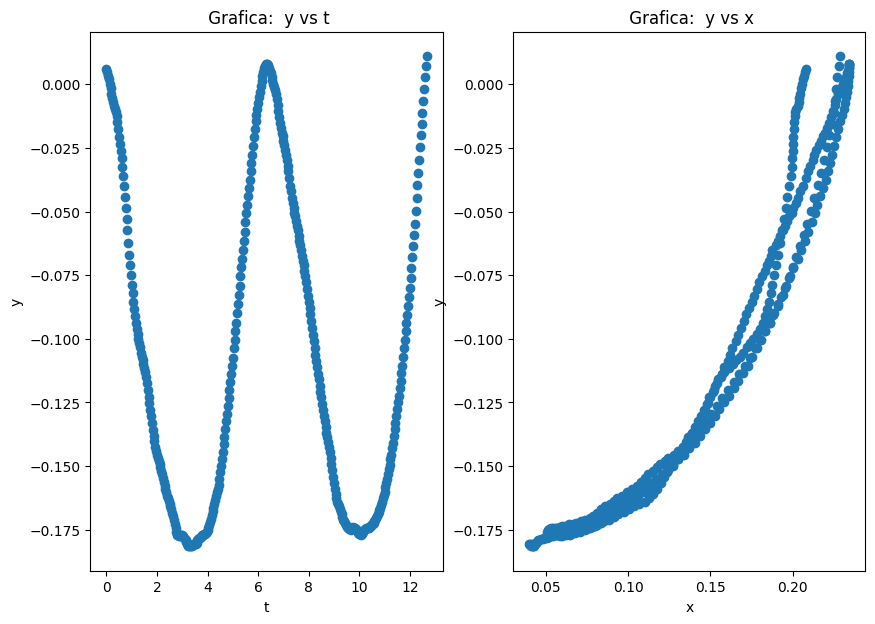

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel("datos.xlsx")
print(df.head)

x = df['x']
y = df['y']
t = df['t']


figure_1 = plt.figure(figsize=(10, 7))
ax_1 = figure_1.add_subplot(1,2,1)

ax_1.scatter(t, y)
ax_1.set_title(" Grafica:  y vs t")
ax_1.set_xlabel('t')
ax_1.set_ylabel('y')

ax_2 = figure_1.add_subplot(1,2, 2)
ax_2.scatter(x, y)
ax_2.set_title(" Grafica:  y vs x")
ax_2.set_xlabel('x')
ax_2.set_ylabel('y')

2. Defina una función que reciba como parámetro el grado polinómico $n$ y el arreglo con los datos de la variable independiente y retorne la matriz $H$ asociada a la regresión con dicho grado polinómico.

In [ ]:
def matriz_h(n,arr):
    s=(len(arr),n+1)
    matriz_result=np.ones(s)
    for i in range(0,len(arr)):
      for j in range (0,n+1):
        matriz_result[i][j]=arr[i]**j



    return matriz_result

h=matriz_h(3,x)
print(h)

[[1.         0.2079263  0.04323335 0.00898935]
 [1.         0.2074316  0.04302787 0.00892534]
 [1.         0.2069511  0.04282876 0.00886346]
 ...
 [1.         0.2270716  0.05156151 0.01170815]
 [1.         0.2281064  0.05203253 0.01186895]
 [1.         0.2286783  0.05229376 0.01195845]]


3. Defina una función que reciba como parámetro la matriz $H$ y el arreglo de puntos de la variable dependiente $y$ y retorne el arreglo de $\beta^*$.

In [ ]:

def beta_c(h, y):
    ht_h=np.dot(h.transpose(),h)
    ht_transpose = np.linalg.inv(ht_h)
    htransp_ht = np.dot(ht_transpose,h.transpose())
    beta_c = np.dot(htransp_ht,y)
    return beta_c


beta_c(h, y)



array([-0.15368709, -0.82059514,  7.40264206, -4.08043073])

4. Utilice su función anterior para encontrar los coeficientes óptimos para los siguientes set de datos:

- $y$ vs $t$
- $y$ vs $x$

Cada uno con los siguientes grados polinómicos:

- Grado 1
- Grado 5
- Grado 9

In [ ]:
grados = [1,5,9]
coef_yt ={1:[],5:[],9:[]}
coef_yx ={1:[],5:[],9:[]}
y_calc_grados_graf1 = {1:[],5:[],9:[], "trig":0}
y_calc_grados_graf2 = {1:[],5:[],9:[]}


h_matriz_yt ={1:[],5:[],9:[]}

h_matriz_yx ={1:[],5:[],9:[]}
def print_coeficientes(coef):
    for i in range(0,len(coef)):
      print("\u03B2_"+str(i)+":"+str(coef[i]))
for g in grados:
    print("___________Grado:"+str(g)+"______________")
    print("Coeficientes más Optimo para y vs t :")
    print("_____________________________________")

    h_matriz_yt[g]=matriz_h(g,t)
    coef_yt[g]=coeficientes=beta_c(h_matriz_yt[g], y)
    print_coeficientes(coeficientes)
    print("\n")

    print("Coeficientes más Optimo para y vs x :")
    print("_____________________________________")
    h_matriz_yx[g]=matriz_h(g,x)
    coef_yx[g]=coeficientes=beta_c(h_matriz_yx[g], y)
    print_coeficientes(coeficientes)
    print("\n")






___________Grado:1______________
Coeficientes más Optimo para y vs t :
_____________________________________
β_0:-0.09876790702403118
β_1:-0.0012476044368589568


Coeficientes más Optimo para y vs x :
_____________________________________
β_0:-0.24953634640392072
β_1:0.9742462894756494


___________Grado:5______________
Coeficientes más Optimo para y vs t :
_____________________________________
β_0:0.05941120125746179
β_1:-0.19653030626103674
β_2:0.04728794747048932
β_3:-0.001211029199004844
β_4:-0.0004638853241999846
β_5:2.857102697474735e-05


Coeficientes más Optimo para y vs x :
_____________________________________
β_0:-0.16462786920136874
β_1:-1.2237976406511584
β_2:32.137697472876106
β_3:-341.87090450068246
β_4:1750.9141911525278
β_5:-3103.9730882327804


___________Grado:9______________
Coeficientes más Optimo para y vs t :
_____________________________________
β_0:0.02589909377140346
β_1:-0.17053041945812014
β_2:0.13846087135806537
β_3:-0.089970272366225
β_4:0.0286088592022244

5. Haga los mismos gráficos del primer punto pero ahora agregando las curvas obtenidas para cada conjunto de datos. Es decir, en el primer gráfico, se deben incluir las tres curvas obtenidas para cada grado polinómico para el conjunto de datos de $y$ vs $t$. En el segundo gráfico, lo mismo pero para $y$ vs $x$.

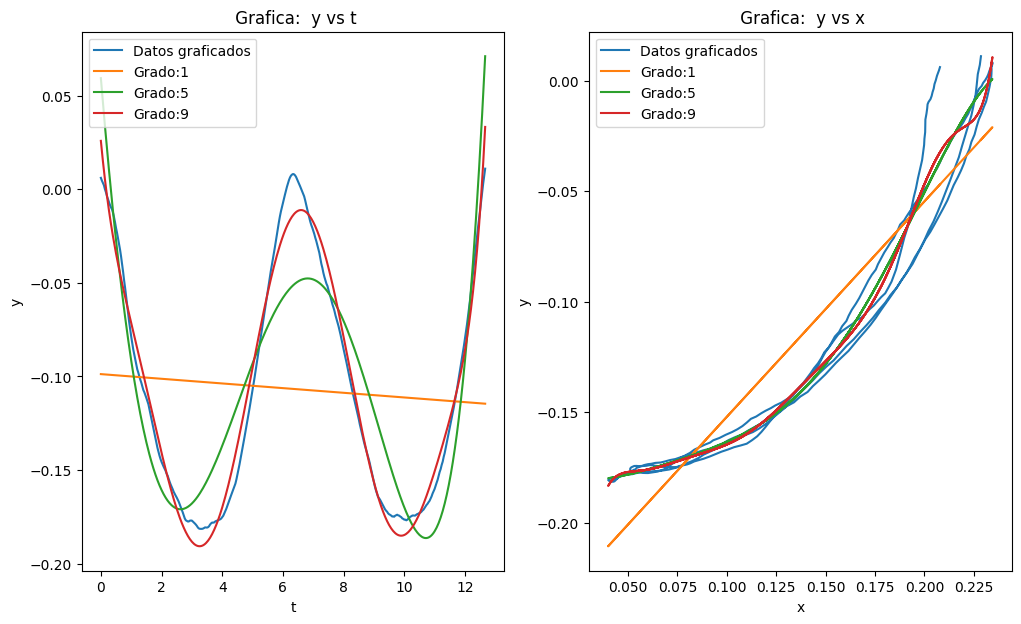

In [ ]:
figure_1 = plt.figure(figsize=(12, 7))


def generate_grafs_yt(h_matriz_yt=h_matriz_yt,coef_yt=coef_yt , grados=grados, figure_1=figure_1 ):
    ax_1 = figure_1.add_subplot(1,2,1)
    ax_1.plot(t,y, label='Datos graficados')

    for g in grados:

        y_grad= np.dot(h_matriz_yt[g],coef_yt[g] )
        ax_1.plot(t,y_grad, label='Grado:'+str(g))
        y_calc_grados_graf1[g]=y_grad
    ax_1.set_xlabel('t')
    ax_1.set_ylabel('y')
    ax_1.set_title(" Grafica:  y vs t")
    ax_1.legend(loc = 'upper left')



def generate_grafs_yx(h_matriz_yx=h_matriz_yx,coef_yx=coef_yx , grados=grados, figure_1=figure_1 ):
    ax_1 = figure_1.add_subplot(1,2,2)
    ax_1.plot(x,y, label='Datos graficados')

    for g in grados:
        y_grad= np.dot(h_matriz_yx[g],coef_yx[g] )
        ax_1.plot(x,y_grad, label='Grado:'+str(g))
        y_calc_grados_graf2[g]=y_grad

    ax_1.set_xlabel('x')
    ax_1.set_ylabel('y')
    ax_1.set_title(" Grafica:  y vs x")
    ax_1.legend(loc = 'upper left')


generate_grafs_yt()
generate_grafs_yx()


6. Note que el conjunto de datos de posición vertical contra el tiempo tiene un comportamiento sinusoidal, luego, diseñe una función que reciba como parámetro el arreglo de datos asociados a la variable independiente y que retone la matriz $H$ para la siguiente ecuación:

\begin{align*}
  y^*=\beta_0 + \beta_1\sin(x) + \beta_2\cos(x)
\end{align*}

In [ ]:
def h_sinosoidal(arr):
    s=(len(arr),3)
    matriz_result=np.ones(s)
    for i in range(0,len(arr)):
        matriz_result[i][0]=1
        matriz_result[i][1]=np.sin(arr[i])
        matriz_result[i][2]=np.cos(arr[i])

    print(matriz_result)




    return matriz_result


7. Obtenta los parámetros óptimos $\beta^*$ para la ecuación trigonométrica anterior para el set de datos de $y$ vs $t$

In [ ]:
def beta_f(h, y):
    ht_h=np.dot(h.transpose(),h)
    ht_transpose = np.linalg.inv(ht_h)
    htransp_ht = np.dot(ht_transpose,h.transpose())
    beta_f = np.dot(htransp_ht,y)
    return beta_f
h_sin = h_sinosoidal(t)

coef_beta_sino=beta_c(h_sin, y)

print_coeficientes(coef_beta_sino)

[[1.         0.         1.        ]
 [1.         0.03332716 0.9994445 ]
 [1.         0.0666173  0.9977786 ]
 ...
 [1.         0.03529206 0.99937704]
 [1.         0.06857552 0.99764593]
 [1.         0.10178282 0.99480664]]
β_0:-0.10754661449126156
β_1:0.02470798021493657
β_2:0.08024587797224247


8. Haga de nuevo el gráfico de $y$ vs $t$ de únicamente el set de datos crudo, la curva polinómica de grado 10 y la nueva curva obtenida con las funciones trigonométricas

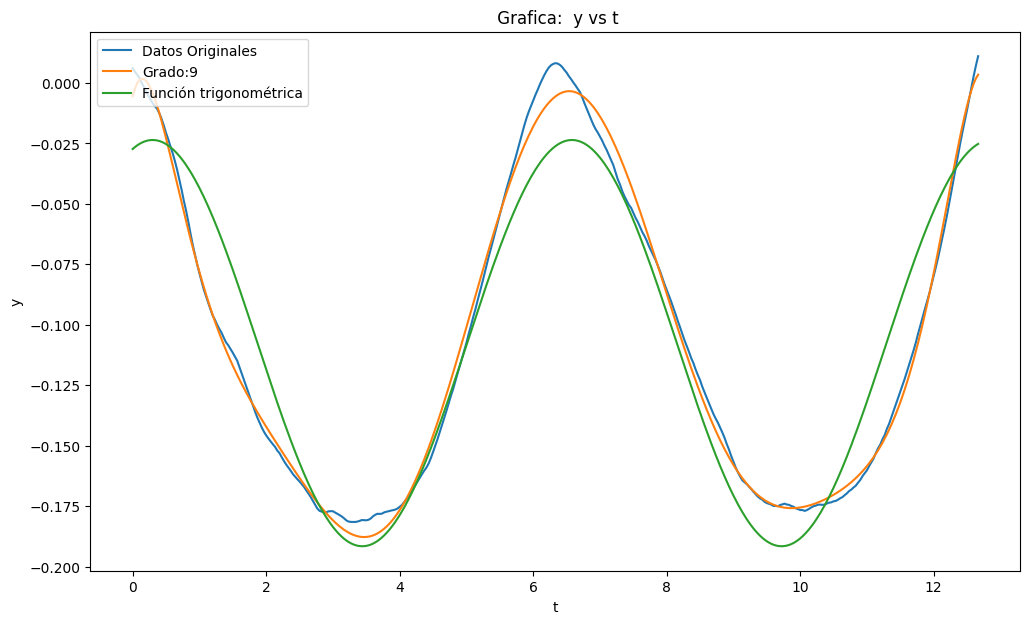

In [ ]:
figure_2 = plt.figure(figsize=(12, 7))
ax_1 = figure_2.add_subplot(1,1,1)

### Grafica original
ax_1.plot(t,y, label='Datos Originales')

## Grado 10
h_matriz_yt_10=matriz_h(10,t)
coef_10=beta_c(h_matriz_yt_10, y)
y_10_grad= np.dot(h_matriz_yt_10,coef_10)
ax_1.plot(t,y_10_grad, label='Grado:9')
y_calc_grados_graf1[9]=y_10_grad



### graf sinosoidal
y_sino= np.dot(h_sin,coef_beta_sino)
ax_1.plot(t,y_sino, label='Función trigonométrica')
y_calc_grados_graf1["trig"]=y_sino


ax_1.set_xlabel('t')
ax_1.set_ylabel('y')
ax_1.set_title(" Grafica:  y vs t")

ax_1.legend(loc = 'upper left')


9. Calcule el valor de la función objetivo para todas las curvas construidas.

In [ ]:
def norma(y_real,y_cal):
    subs=np.subtract(y_real, y_cal)
    norma = 0
    for i in range(0,len(subs)):
        norma += subs[i]**2
    return norma


print("Grafico 1: y vs t ")
print("-----------")
for i in y_calc_grados_graf1:
    norma_calc=norma(y,y_calc_grados_graf1[i])
    if (i!= "trig" ):
      print("Polinomio de grado "+str(i)+": "+str(norma_calc))
    else:
      print("Trigonometrica: "+str(norma_calc))

print("\nGrafico 2: y vs x ")
print("-----------")
for i in y_calc_grados_graf2:
    norma_calc=norma(y,y_calc_grados_graf2[i])
    if (i!= "trig"):
      print("Polinomio de grado "+str(i)+": "+str(norma_calc))
    else:
      print("Trigonometrica: "+str(norma_calc))




Grafico 1: y vs t 
-----------
Polinomio de grado 1: 1.4966173645383187
Polinomio de grado 5: 0.27045379312546014
Polinomio de grado 9: 0.009595275910492699
Trigonometrica: 0.1494001970878129

Grafico 2: y vs x 
-----------
Polinomio de grado 1: 0.16343386354819606
Polinomio de grado 5: 0.049288798509781864
Polinomio de grado 9: 0.04539852301423611



10. Teniendo el cuenta los valores de la función objetivo, responda:




- Para el gráfico de $y$ vs $t$, ¿cuál grado fue mejor?

Se puede ver que con un grado polinomico de grado 9 es mucho mejor, de hecho esto también se puede ver al calcular la diferencia total que tan solo es de 0.0095.

- Para el gráfico de $y$ vs $x$, ¿cuál grado fue mejor?

Se puede ver que con un grado polinomico de grado 9 es mucho mejor, de hecho esto también se puede ver al calcular la diferencia total que tan solo es de 0.045.

- ¿Qué diferencias encuentra en los resultados de regresión para el set de datos de $y$ vs $t$ en comparación con el de $y$ vs $x$?


La diferencia se puede ver en la sección 5 de este notebook donde se imprime los coeficientes. Cúando revisamos los valores que toma β podemos ver que para la gráfica 1 los valores de β son números muy bajitos en comparación a gráfica 2 que está en entre los valores de los miles incluso millones para los betas más grandes.

- ¿Considera que la regresión con funciones trigonométricas tuvo mejores o peores resultados que la polinómica?

En este caso en concreto la polinomica de grado 9 y grado 10 tuvieron mejores resultados que el resultado de la trigonométrica. Sin embargo, es importante notar que la trigonometrica tubo mejores resultados que los de grado 5 y grado 1.

- Aumente el grado polinómico por encima de 10 y analice los resultados. ¿Cree que aumentar el grado polinómico al infinito hará que el error tienda a cero?

Para la gráfica 1: **y vs t** esto no es verdad, de hecho el error la diferencia es bastante alta, de hecho de grado 1 a grado 10 hay una disminución significante. Sin embargo, se da un aumento desde grado 11 en adelante.

Para la gráfica 2: **y vs x**, no hay una tendencia lineal en la que se suba o baje la diferencia.

En el siguiente código se puede ver la norma entre el punto real y el punto producto de la regresión líneal.







In [ ]:
for i in range(10,30):
    h_matriz_yt_10=matriz_h(i,t)
    coef_10=beta_c(h_matriz_yt_10, y)
    y_10_grad= np.dot(h_matriz_yt_10,coef_10)
    y_calc_grados_graf1[i]=y_10_grad
for i in range(10,30):
    h_matriz_yt_10=matriz_h(i,x)
    coef_10=beta_c(h_matriz_yt_10, y)
    y_10_grad= np.dot(h_matriz_yt_10,coef_10)
    y_calc_grados_graf2[i]=y_10_grad


print("Grafico 1: y vs t ")
print("-----------")
for i in y_calc_grados_graf1:
    norma_calc=norma(y,y_calc_grados_graf1[i])
    if (i!= "trig" ):
      print("Polinomio de grado "+str(i)+": "+str(norma_calc))
    else:
      print("Trigonometrica: "+str(norma_calc))

print("\nGrafico 2: y vs x ")
print("-----------")
for i in y_calc_grados_graf2:
    norma_calc=norma(y,y_calc_grados_graf2[i])
    if (i!= "trig"):
      print("Polinomio de grado "+str(i)+": "+str(norma_calc))
    else:
      print("Trigonometrica: "+str(norma_calc))

Grafico 1: y vs t 
-----------
Polinomio de grado 1: 1.4966173645383187
Polinomio de grado 5: 0.27045379312546014
Polinomio de grado 9: 0.009595275910492699
Trigonometrica: 0.1494001970878129
Polinomio de grado 10: 0.009595275910492699
Polinomio de grado 11: 0.025507477840783853
Polinomio de grado 12: 1.0932604289801664
Polinomio de grado 13: 1.5856860911131327
Polinomio de grado 14: 4.6489459292369615
Polinomio de grado 15: 1107.7319782351726
Polinomio de grado 16: 151.27964842591143
Polinomio de grado 17: 22.013160771630815
Polinomio de grado 18: 82488.96090707854
Polinomio de grado 19: 3192.075910068787
Polinomio de grado 20: 1031060.8097893575
Polinomio de grado 21: 10350.12410393476
Polinomio de grado 22: 71508.70633411933
Polinomio de grado 23: 197967.55727707825
Polinomio de grado 24: 3084.738076349506
Polinomio de grado 25: 546456.994269164
Polinomio de grado 26: 303340.5757732573
Polinomio de grado 27: 6570629.10760267
Polinomio de grado 28: 2678579.1244644313
Polinomio de gra